# GOES-16 Images

In [7]:
import xarray as xr
import os
import matplotlib.pyplot as plt

In [8]:
ch05 = xr.load_dataset('./goes-l1b/OR_ABI-L1b-RadF-M3C05_G16_s20172740000386_e20172740011152_c20172740011197.nc')

In [9]:
ch05

<xarray.Dataset>
Dimensions:                                 (y: 10848, x: 10848,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             band: 1, num_star_looks: 24)
Coordinates:
    t                                       datetime64[ns] 2017-10-01T00:05:5...
  * y                                       (y) float64 0.1519 ... -0.1519
  * x                                       (x) float64 -0.1519 ... 0.1519
    y_image                                 float32 0.0
    x_image                                 float32 0.0
    band_id                                 (band) int8 5
    band_wavelength                         (band) float32 1.61
    t_star_look                             (num_star_looks) datetime64[ns] 2...
    band_wavelength_star_look               (num_star_looks) float32 -999.0 ....
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band, num_star_looks
Data variables: (12/31)
    Rad                                     (y, x) float32 nan nan ... nan nan
    DQF                                     (y, x) float32 nan nan ... nan nan
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 -2147483647
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    percent_uncorrectable_L0_errors         float64 0.0
    earth_sun_distance_anomaly_in_AU        float64 1.001
    algorithm_dynamic_input_data_container  int32 -2147483647
    processing_parm_version_container       int32 -2147483647
    algorithm_product_version_container     int32 -2147483647
    star_id                                 (num_star_looks) float32 nan ... nan
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v25, 05 July 2013)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    production_data_source:    Realtime
    timeline_id:               ABI Mode 3
    date_created:              2017-10-01T00:11:19.7Z
    time_coverage_start:       2017-10-01T00:00:38.6Z
    time_coverage_end:         2017-10-01T00:11:15.2Z
    id:                        28c56572-b563-4295-a357-bd0d373a9a45

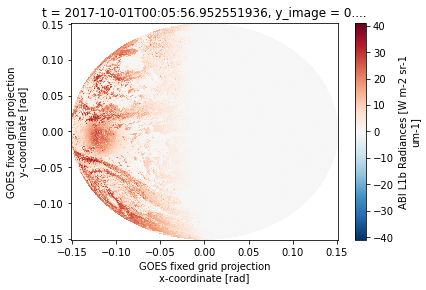

In [10]:
ch05.Rad.plot()

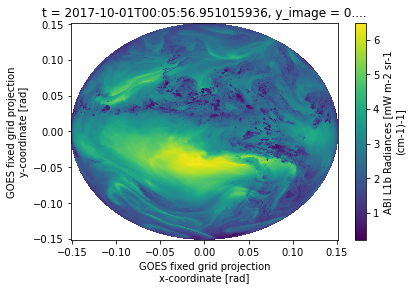

In [11]:
ch08 = xr.load_dataset('./goes-l1b/OR_ABI-L1b-RadF-M3C08_G16_s20172740000386_e20172740011152_c20172740011198.nc')
ch08.Rad.plot()

In [12]:
bands = os.listdir('./goes-l1b/')
bands.sort()

In [19]:
for band in bands:
    da = xr.load_dataset('./goes-l1b/' + band)
    print(da)
    print('\n\n\n')

<xarray.Dataset>
Dimensions:                                 (y: 10848, x: 10848,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             band: 1, num_star_looks: 24)
Coordinates:
    t                                       datetime64[ns] 2017-10-01T00:05:5...
  * y                                       (y) float64 0.1519 ... -0.1519
  * x                                       (x) float64 -0.1519 ... 0.1519
    y_image                                 float32 0.0
    x_image                                 float32 0.0
    band_id                                 (band) int8 1
    band_wavelength                         (band) float32 0.47
    t_star_look                             (num_star_looks) datetime64[ns] 2...
    band_wavelength_star_look               (num_star_looks) float32 -999.0 ....
Dimensions without coordinates: number_of_time_bounds, number

In [21]:
for band in bands:
    da = xr.load_dataset('./goes-l1b/' + band)
    fig, ax = plt.subplots(1,1)
    da.Rad.plot(ax=ax)

In [13]:
da = xr.load_dataset('./goes-l1b/' + bands[0])
da.Rad.plot()

In [9]:
import numpy as np
filesize = [40.9, 339.7, 54.2, 11.9, 57.2, 11.5, 25.8, 20, 18.9, 23.2, 29.4, 24.4, 29.8, 29.7, 29.2, 20.8]
timestep = np.sum(filesize)
f'each timestep has {timestep} MB of data'

'each timestep has 766.6 MB of data'

In [13]:
import numpy as np
filesize = [40.9, 50, 54.2, 11.9, 57.2, 11.5, 25.8, 20, 18.9, 23.2, 29.4, 24.4, 29.8, 29.7, 29.2, 20.8]
timestep = np.sum(filesize)
f'{31 * 24 * 4 * timestep / 1e6:.1f} TB'

'1.4 TB'

In [8]:
f'{31 * 24 * 4 * timestep / 1e6:.1f} TB'

'2.3 TB'

# 2.3 TB (October 2017)
in 2017: full-disk image every 15 minutes
31 days in Oct

In [3]:
bands = os.listdir('./goes-16-171001/')
bands.sort()

![image](./goes-bands.png)

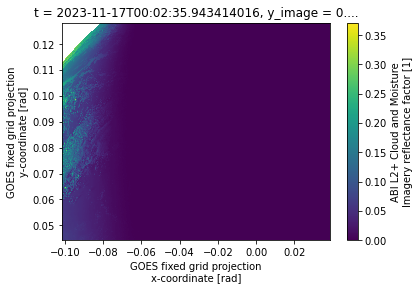

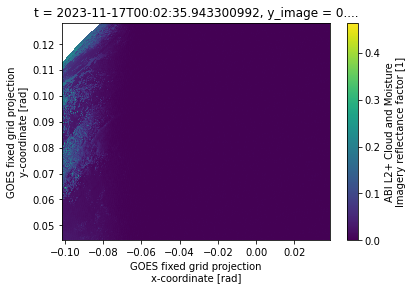

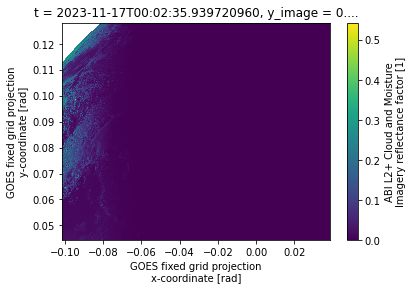

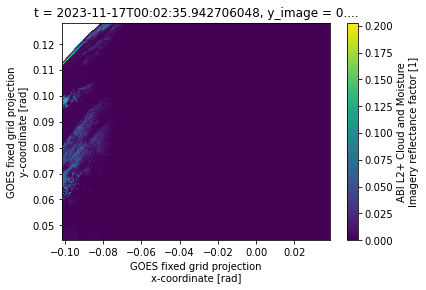

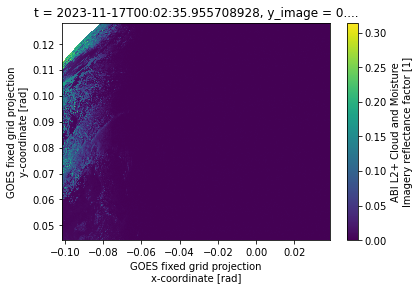

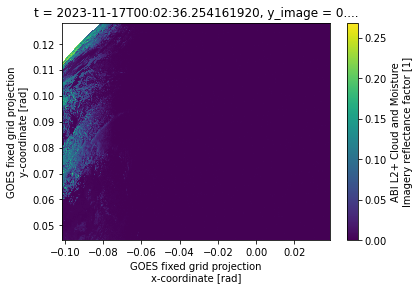

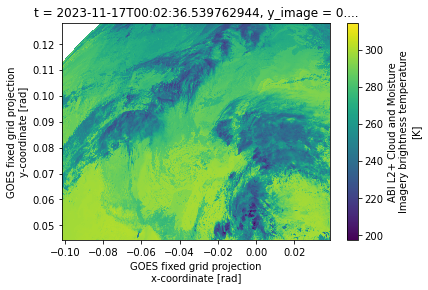

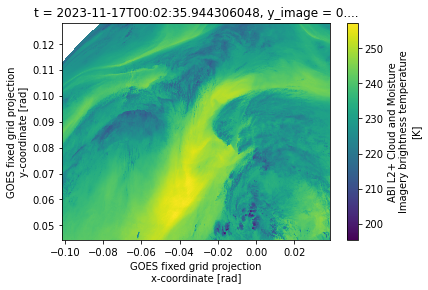

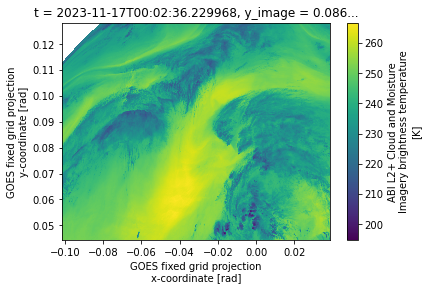

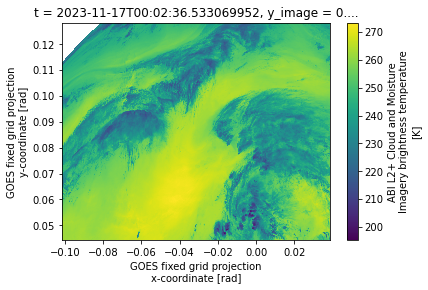

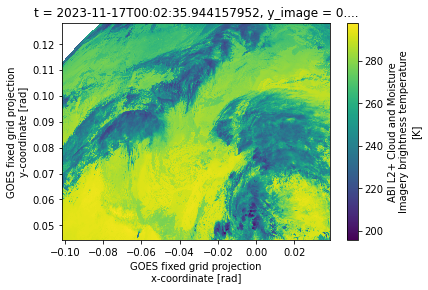

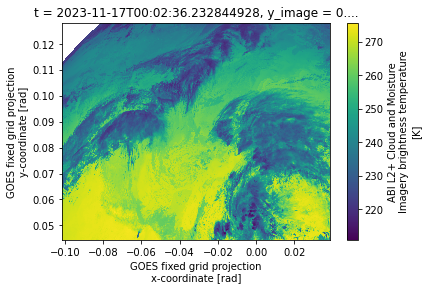

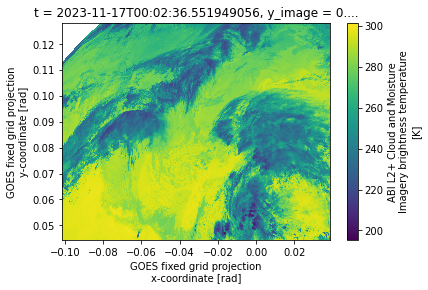

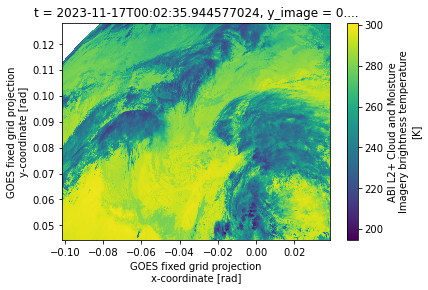

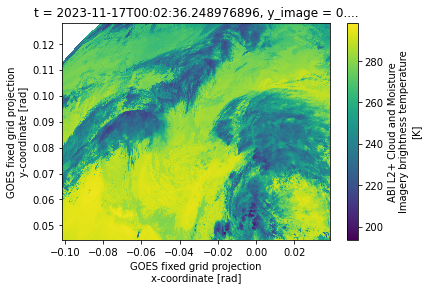

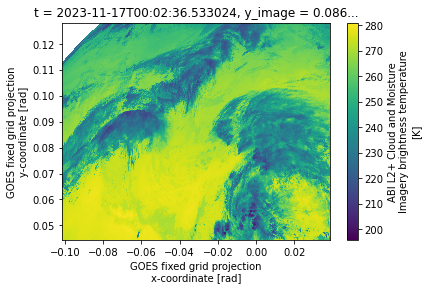

In [5]:
for band in bands:
    da = xr.load_dataset('./goes-16-171001/' + band)
    fig, ax = plt.subplots(1,1)
    da.CMI.plot(ax=ax)

## Notes:
- amount of data reduced when we only take tropical band
- visible channels only useful during daylight hours
- are we trying to translate to **all** MODIS bands? otherwise we can choose a subset of MODIS bands and then use only the GOES bands that are relevant

**in November 2017, GOES-16 began a drift to its operational GOES East position, and was declared as fully operational on 18 December 2017**

### **any month after Jan 2018**